In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

signal=100
delta=0.5
flucLow=0.59
flucHigh=0.61


avAlphaVec=[]
avBetaVec=[]
avGammaVec=[]
for j in range(0,100):
    
    minAlpha=0
    minBeta=0
    minGamma=0
    minTimeScore=10000
    alpha=0.5
    beta=0.5
    gamma=0.5
    alphaVec=[alpha]
    betaVec=[beta]
    gammaVec=[gamma]
    oldTimeScore=10000
    for i in range(0,100000):
        p1Conc=0.5
        p2Conc=0.5
        p3Conc=0.5
        
        for k in range(0,10000):
            p1Conc=(1-alpha-beta)*p1Conc+signal
            p2Conc=(1-gamma)*p2Conc+ alpha*p1Conc
            p3ConcOld=p3Conc
            p3Conc=(1-delta)*p3Conc-gamma*p2Conc+beta*p1Conc
            if p3ConcOld == p3Conc and k>0:
                timeScore=k
                
                break
        #if timeScore> oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        #if timeScore< oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        if timeScore< minTimeScore and p3Conc >flucLow and p3Conc < flucHigh:
            #print(timeScore)
            minTimeScore = timeScore
            minAlpha=alpha
            minBeta=beta
            minGamma=gamma
            minp3=p3Conc
        #print(p3Conc)
        oldTimeScore=timeScore
        oldAlpha=alpha
        oldBeta=beta
        oldGamma=gamma   
        if p3Conc <0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta <0.99:
                beta=beta+0.01
            if rando > 0.33 and rando <= 0.66 and alpha>0.01:
                alpha=alpha-0.01
            if rando >0.66 and gamma> 0.01:
                gamma = gamma - 0.01
        if p3Conc >= 0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta>0.01:
                beta=beta-0.01
            if rando > 0.33 and rando <= 0.66 and alpha<0.99:
                alpha=alpha+0.01
            if rando >0.66 and gamma<0.99:
                gamma = gamma + 0.01
        alphaVec.append(alpha)
        betaVec.append(beta)
        gammaVec.append(gamma)
    #avAlphaVec.append(alphaVec[999])
    #avBetaVec.append(betaVec[999])
    #avGammaVec.append(gammaVec[999])
    #plt.plot(avAlphaVec,'r.')
    #plt.plot(avBetaVec,'b.')
    #plt.plot(avGammaVec,'g.')
    #plt.show()
    print("min",minTimeScore, minAlpha,minBeta,minGamma,minp3)

KeyboardInterrupt: 

0


C:\Users\lcooper7\AppData\Local\Temp/ipykernel_28764/1044110213.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


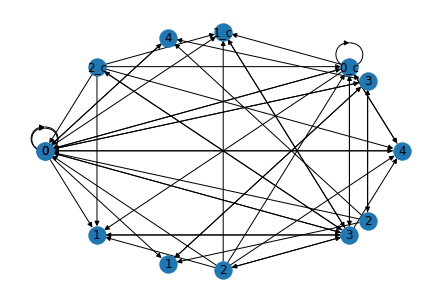

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
fig=plt.figure()
vertices=5
edgeProb=0.4
G=nx.erdos_renyi_graph(vertices,edgeProb,directed=True)
G.add_edge(0, 0)
nx.draw_shell(G,with_labels=True)

duplicationGenes = [0,1,2]
G_dup=gf.duplicate_genes(G,duplicationGenes)
nx.draw_shell(G_dup,with_labels=True)
fig.show()

In [2]:
n=3
m=1
qCon=0.5
qMod = 0.5
G=nx.DiGraph(nx.scale_free_graph(2))
G,G3=gf.network_birth(G,n,n,qCon,qMod)
G1,G2=gf.network_birth(G,m,m,qCon,qMod,iteration = n)
G=gf.label_conserver(G)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
print(len(list(G1.nodes)),len(list(G2.nodes)))
nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)
G_orig=copy.deepcopy(G)
G1_forest=gf.duplication_forest(G1,n+m)
#G2_forest=gf.duplication_forest(G2,n+m)
print(G.nodes[1]['orig_label'])

[0, 1, 2]
1
0.3176102355592272 2 1
1
2
0.5127025380238859 3 2
2
3
0.616923639044196 4 2
3
1
0.1277089256474807 2 0
1
2
0.42171762011396097 3 1
2
3
0.7329320305835179 4 3
3
[0, 1, 2, '1_1', '2_2', '2_3']
4
0.23389128819800442 5 1
4
4
0.41822681580298215 5 2
4
{0: {'orig_label': 0}, 1: {'orig_label': 1}, 2: {'orig_label': 2}, '1_1': {'orig_label': '1_1'}, '2_2': {'orig_label': '2_2'}, '2_3': {'orig_label': '2_3'}}


KeyError: 'orig_label'

True


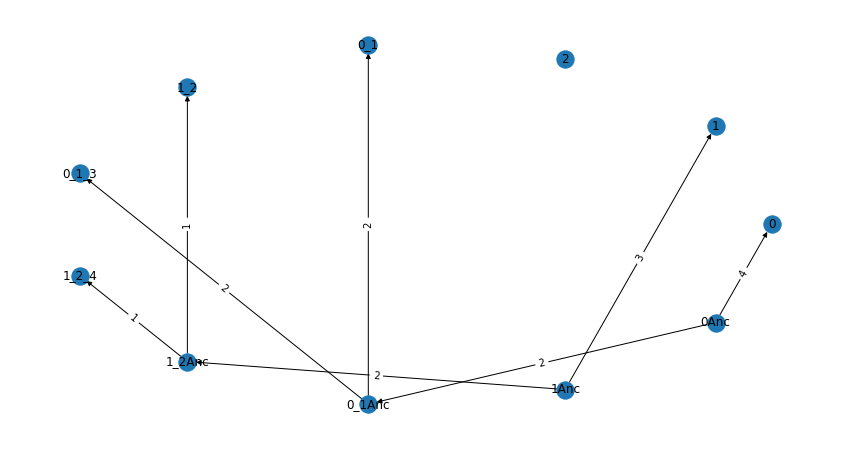

In [14]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G1_forest)
edge_labels = dict([((n1, n2), G1_forest[n1][n2]['weight'])
                    for n1, n2 in G1_forest.edges])
nx.draw_networkx_edge_labels(G1_forest, pos, edge_labels=edge_labels)
nx.draw_circular(G1_forest,with_labels=True)
print(nx.is_forest(G1_forest))

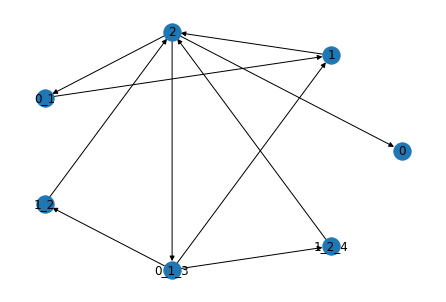

In [15]:
nx.draw_circular(G1,with_labels=True)

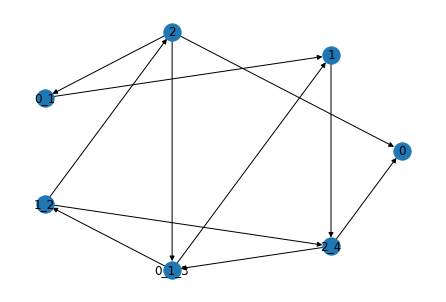

In [16]:
nx.draw_circular(G2,with_labels=True)

10
7
EC: 0.7
ICS: 1.0
S3: 0.7
New MEtric 0.8235294117647058


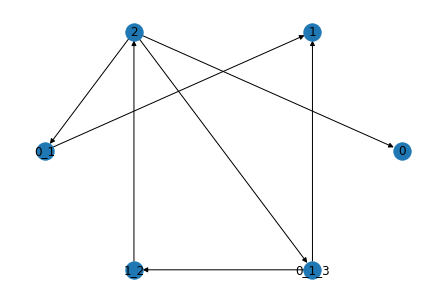

In [17]:
sourceEdges= len(list(G1.edges()))
print(sourceEdges)
conservedEdge=0

for x in list(G1.nodes):
    for y in list(G2.nodes):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
nx.draw_circular(G2_ind,with_labels=True)
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))

In [18]:
#G1=nx.DiGraph(nx.scale_free_graph(10000))
#G2=nx.DiGraph(nx.scale_free_graph(10000))






In [19]:


G=nx.convert_node_labels_to_integers(G_orig)
G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped=gf.NF_many_to_one(G1,G2,32,0.8)
mapping = dict(alignVec)
print(mapped)
G1=nx.induced_subgraph(G1,list(mapped))
G1=nx.relabel_nodes(G1,mapping)

print(alignVec)
print(G1.edges)
print(G2.edges)


true pair 1.8 0 0
greater 1.8 0 0
equal 1.8 0 3
greater 2.0666666666666664 1 0
true pair 3.0 1 1
greater 3.0 1 1
true pair 41.96000000000001 2 2
greater 41.96000000000001 2 2
true pair 2.0 3 3
true pair 1.8 4 4
true pair 2.4000000000000004 5 5
true pair 1.6 6 6
2 2
true pair 1.8 0 0
greater 1.8 0 0
equal 1.8 0 3
greater 2.0666666666666664 1 0
true pair 3.0 1 1
greater 3.0 1 1
true pair 2.0 3 3
true pair 1.8 4 4
equal 3.0 5 2
true pair 2.4000000000000004 5 5
true pair 1.6 6 6
1 1
true pair 1.8 0 0
greater 1.8 0 0
equal 1.8 0 3
equal 1.8 3 1
true pair 2.0 3 3
greater 2.0 3 3
equal 2.0 4 3
true pair 1.8 4 4
greater 3.0 5 2
true pair 26.400000000000002 5 5
greater 26.400000000000002 5 5
true pair 1.6 6 6
5 5
true pair 1.8 0 0
greater 1.8 0 0
equal 1.8 0 3
equal 1.8 3 1
true pair 2.0 3 3
greater 2.0 3 3
equal 2.0 4 3
true pair 1.8 4 4
equal 2.0 6 3
true pair 1.6 6 6
3 3
true pair 1.8 0 0
greater 1.8 0 0
equal 1.8 0 3
equal 1.8 4 1
greater 2.0 4 3
true pair 1.8 4 4
equal 2.0 6 3
true pair 1.

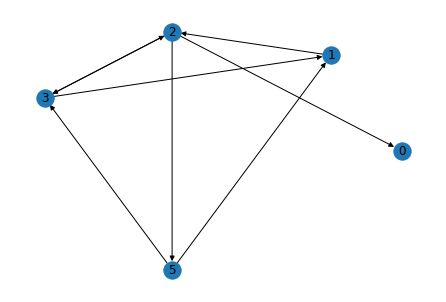

In [20]:
pos=nx.circular_layout(G2)
nx.draw(G1,with_labels=True,pos=pos)


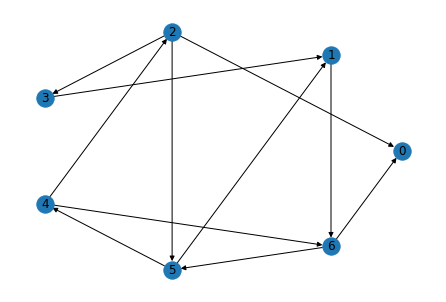

In [21]:

nx.draw(G2,with_labels=True,pos=pos)


8
5
EC: 0.625
ICS: 1.0
S3: 0.625
New MEtric 0.7692307692307693


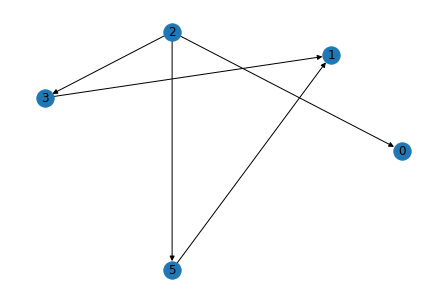

In [22]:
sourceEdges= len(list(G1.edges()))
print(sourceEdges)
conservedEdge=0
for x in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
    for y in range(0,max(len(list(G1.nodes)),len(list(G2.nodes)))):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))
nx.draw(G2_ind,with_labels=True,pos=pos)

true pair 6.842857142857143 0 0
greater 6.842857142857143 0 0
true pair 5.333333333333334 1 1
true pair 3763.9999999999995 2 2
greater 3763.9999999999995 2 2
true pair 3.0 3 3
true pair 4.142857142857143 4 4
true pair 4.514285714285714 10 10
true pair 4.6 6 6
true pair 1180.4480000000003 11 11
true pair 3585.0 9 9
true pair 2.5333333333333337 5 5
2 2
true pair 61.1 0 0
greater 61.1 0 0
true pair 75.66666666666667 1 1
greater 75.66666666666667 1 1
true pair 3.0 3 3
true pair 58.4 4 4
greater 93.16000000000001 4 5
true pair 64.8 10 10
true pair 4.6 6 6
greater 129.4 13 7
greater 2753.3120000000004 11 2
true pair 1180.4480000000003 11 11
true pair 3585.0 9 9
greater 3585.0 9 9
true pair 30.66666666666667 5 5
9 9
true pair 61.1 0 0
greater 61.1 0 0
true pair 1195.6666666666667 1 1
greater 1195.6666666666667 1 1
true pair 3.0 3 3
true pair 58.4 4 4
true pair 1024.8 10 10
true pair 4.6 6 6
greater 2753.3120000000004 11 2
true pair 1180.4480000000003 11 11
true pair 30.66666666666667 5 5
11 2

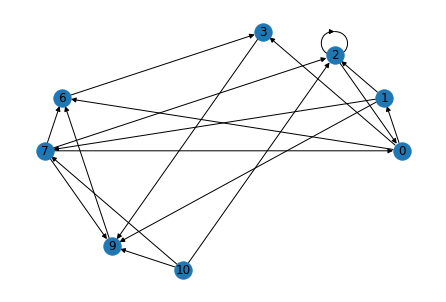

In [20]:

alignVec,mapped=gf.NF_many_to_one(G1,G,32,0.8)
print(mapped)
G1=nx.induced_subgraph(G1,list(mapped))
mapping = dict(alignVec)
G1=nx.relabel_nodes(G1,mapping)
nx.draw(G1,with_labels=True,pos=pos)

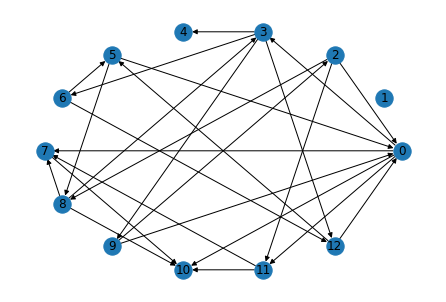

In [11]:
nx.draw(G,with_labels=True,pos=pos)

In [ ]:
def node_match(a,b):
    print(a,b)
    if a==b:
        return True
    else:
        return False
gf.graph_edit_distance(G1,G2,node_match)

AttributeError: module 'gene_functions' has no attribute 'graph_edit_distance'